<a href="https://colab.research.google.com/github/SamarHamdy/Train.csv/blob/main/FinalProj_Samar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mtl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import missingno as msno
%matplotlib inline

In [2]:
filename='LoanExport.csv'
Loan_data= pd.read_csv(filename)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
type(Loan_data)

pandas.core.frame.DataFrame

In [4]:
print(Loan_data.shape)

(206934, 28)


In [5]:
print(Loan_data.columns)

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'Channel', 'PPM', 'ProductType', 'PropertyState',
       'PropertyType', 'PostalCode', 'LoanSeqNum', 'LoanPurpose',
       'OrigLoanTerm', 'NumBorrowers', 'SellerName', 'ServicerName',
       'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment'],
      dtype='object')


In [6]:
Loan_data.dtypes

CreditScore             int64
FirstPaymentDate        int64
FirstTimeHomebuyer     object
MaturityDate            int64
MSA                    object
MIP                     int64
Units                   int64
Occupancy              object
OCLTV                   int64
DTI                     int64
OrigUPB                 int64
LTV                   float64
OrigInterestRate      float64
Channel                object
PPM                    object
ProductType            object
PropertyState          object
PropertyType           object
PostalCode             object
LoanSeqNum             object
LoanPurpose            object
OrigLoanTerm          float64
NumBorrowers           object
SellerName             object
ServicerName           object
EverDelinquent        float64
MonthsDelinquent      float64
MonthsInRepayment     float64
dtype: object

In [7]:
#count data types
Loan_data.dtypes.value_counts()

object     14
int64       8
float64     6
dtype: int64

In [ ]:
Loan_data.describe()


,CreditScore,FirstPaymentDate,MaturityDate,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment
count,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000
mean,708.936991,199904.760553,202902.367043,9.216685,1.026022,76.960529,30.033453,124940.387921,76.937986,6.926547,359.835375,0.197848,1.837729,60.805291
std,68.408791,13.821228,16.090508,12.648273,0.202986,15.236154,13.203974,53657.440624,15.225298,0.343541,2.286939,0.398378,8.809392,46.142599
min,0.000000,199901.000000,202402.000000,0.000000,0.000000,0.000000,0.000000,8000.000000,0.000000,4.000000,301.000000,0.000000,0.000000,1.000000
25%,675.000000,199903.000000,202902.000000,0.000000,1.000000,70.000000,22.000000,83000.000000,70.000000,6.750000,360.000000,0.000000,0.000000,34.000000
50%,717.000000,199904.000000,202903.000000,0.000000,1.000000,80.000000,31.000000,117000.000000,80.000000,6.875000,360.000000,0.000000,0.000000,48.000000
75%,753.000000,199905.000000,202904.000000,25.000000,1.000000,90.000000,39.000000,160000.000000,90.000000,7.125000,360.000000,0.000000,0.000000,63.000000
max,849.000000,201303.000000,204302.000000,55.000000,4.000000,110.000000,65.000000,497000.000000,103.000000,12.350000,361.000000,1.000000,180.000000,212.000000


Abbriviations:

MSA - Marketing Services Agreements

OCLTV - Combined loan-to-value

LTV - Loan to value

PPM - Private Placement Memorandum

MIP% - Mortgag Insurance Percentage / MIP- Mortgage Insurance Premium

OCLTV - Original Combined Loan to Value

DTI - Debt to Income ratio

OrigUPB - Original Unpaid principal balance

PPM - Prepayment Penalty Mortgage

In [8]:
Loan_data.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360.0,2,FL,WASHINGTONMUTUALBANK,0.0,0.0,52.0
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360.0,1,FT,CHASEHOMEFINANCELLC,0.0,0.0,144.0
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360.0,2,FL,WASHINGTONMUTUALBANK,0.0,0.0,67.0
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360.0,2,GM,GMACMTGECORP,0.0,0.0,35.0
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360.0,2,GM,GMACMTGECORP,0.0,0.0,54.0


**Borrower Financial Information:** Credit Score, First_Time_Homebuyer_Flag, original debt-to-income (DTI) ratio, number of borrowers, occupancy status (primary residence, investment or second home)

**Loan Information:** First_Payment (date), Maturity_Date, MI_pert (% mortgage insured), original LTV (loan-to-value) ratio, original combined LTV ratio, original interest rate, original unpaid balance, PPM (prepayment penalty mortgage) flag, loan purpose (purchase vs refinance), original loan term, super-conforming flag

**Property information:** number of units, property type (condo, single-family home, etc.)

**Location:** MSA_Code (Metropolitan statistical area), Property_state, postal_code

**Seller/Servicer information: **channel (retail, broker, etc.), seller name, servicer name

In [9]:
Loan_data.tail()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
206929,747,199905,N,202904,24860,30,1,O,95,28,...,29600.0,F199Q1144321,P,360.0,2,NaN,Other servicers,0.0,0.0,30.0
206930,747,199905,N,202904,25420,25,1,O,89,41,...,17000.0,F199Q1080927,N,360.0,1,Ot,Other servicers,0.0,0.0,68.0
206931,747,199905,N,202904,25420,30,1,O,95,40,...,17000.0,F199Q1348909,P,360.0,2,AC,Other servicers,0.0,0.0,210.0
206932,747,199905,N,202904,25540,25,1,O,90,28,...,6000.0,F199Q1057957,P,360.0,2,NO,WELLSFARGOHOMEMORTGA,0.0,0.0,45.0
206933,747,199905,N,202904,25860,0,1,O,64,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Unit** refres to number of properties morrtgage

**Occupancy** values refer to O:owner ,Occupaied ,I:investment Peoperty ,S:secondary home

**Channel** values refer to R:retail, B:broker, C:correspondent

**Product** Type value FRM:fixed rate mortgages

In [10]:
Loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206934 entries, 0 to 206933
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         206934 non-null  int64  
 1   FirstPaymentDate    206934 non-null  int64  
 2   FirstTimeHomebuyer  206934 non-null  object 
 3   MaturityDate        206934 non-null  int64  
 4   MSA                 206934 non-null  object 
 5   MIP                 206934 non-null  int64  
 6   Units               206934 non-null  int64  
 7   Occupancy           206934 non-null  object 
 8   OCLTV               206934 non-null  int64  
 9   DTI                 206934 non-null  int64  
 10  OrigUPB             206934 non-null  int64  
 11  LTV                 206933 non-null  float64
 12  OrigInterestRate    206933 non-null  float64
 13  Channel             206933 non-null  object 
 14  PPM                 206933 non-null  object 
 15  ProductType         206933 non-nul

In [17]:
#filter columns by dtype
Loan_data.select_dtypes(include=['float64']).columns

Index(['LTV', 'OrigInterestRate', 'OrigLoanTerm', 'EverDelinquent',
       'MonthsDelinquent', 'MonthsInRepayment'],
      dtype='object')

In [18]:
Loan_data.select_dtypes(include=['object']).columns

Index(['FirstTimeHomebuyer', 'MSA', 'Occupancy', 'Channel', 'PPM',
       'ProductType', 'PropertyState', 'PropertyType', 'PostalCode',
       'LoanSeqNum', 'LoanPurpose', 'NumBorrowers', 'SellerName',
       'ServicerName'],
      dtype='object')

In [19]:
Loan_data.select_dtypes(include=['int64']).columns

Index(['CreditScore', 'FirstPaymentDate', 'MaturityDate', 'MIP', 'Units',
       'OCLTV', 'DTI', 'OrigUPB'],
      dtype='object')

In [21]:
# convert column that contain Date value to datetime 
Loan_data['FirstPaymentDate'] = pd.to_datetime(Loan_data['FirstPaymentDate'])

Loan_data['MaturityDate'] = pd.to_datetime(Loan_data['MaturityDate'])

In [22]:
Loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206934 entries, 0 to 206933
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   CreditScore         206934 non-null  int64         
 1   FirstPaymentDate    206934 non-null  datetime64[ns]
 2   FirstTimeHomebuyer  206934 non-null  object        
 3   MaturityDate        206934 non-null  datetime64[ns]
 4   MSA                 206934 non-null  object        
 5   MIP                 206934 non-null  int64         
 6   Units               206934 non-null  int64         
 7   Occupancy           206934 non-null  object        
 8   OCLTV               206934 non-null  int64         
 9   DTI                 206934 non-null  int64         
 10  OrigUPB             206934 non-null  int64         
 11  LTV                 206933 non-null  float64       
 12  OrigInterestRate    206933 non-null  float64       
 13  Channel             206933 no

Processing Data

In [23]:
Loan_data.corr()

,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment
CreditScore,1.000000,-0.078480,-0.000843,-0.075210,-0.017742,0.036925,-0.075499,-0.090413,0.006676,-0.149670,-0.115365,-0.032668
MIP,-0.078480,1.000000,-0.048504,0.729289,0.083277,0.003037,0.730580,0.115526,0.011151,0.032675,0.034549,-0.087611
Units,-0.000843,-0.048504,1.000000,-0.060889,0.008211,0.039129,-0.060732,0.071992,0.005103,0.007752,-0.005415,0.024484
OCLTV,-0.075210,0.729289,-0.060889,1.000000,0.082155,0.076858,0.999345,0.086837,0.016740,0.034270,0.042993,-0.088436
DTI,-0.017742,0.083277,0.008211,0.082155,1.000000,0.061530,0.081651,0.084274,0.029405,0.040639,0.028321,-0.003871
OrigUPB,0.036925,0.003037,0.039129,0.076858,0.061530,1.000000,0.076209,-0.135152,-0.002545,-0.081305,-0.079268,-0.205998
LTV,-0.075499,0.730580,-0.060732,0.999345,0.081651,0.076209,1.000000,0.087134,0.016642,0.034539,0.043152,-0.088643
OrigInterestRate,-0.090413,0.115526,0.071992,0.086837,0.084274,-0.135152,0.087134,1.000000,-0.004125,0.053039,0.047319,-0.109395
OrigLoanTerm,0.006676,0.011151,0.005103,0.016740,0.029405,-0.002545,0.016642,-0.004125,1.000000,0.007702,0.005745,0.014769
EverDelinquent,-0.149670,0.032675,0.007752,0.034270,0.040639,-0.081305,0.034539,0.053039,0.007702,1.000000,0.423373,0.259599


In [25]:
#count/find null values
missing_values= Loan_data.isnull().sum()
missing_values

CreditScore               0
FirstPaymentDate          0
FirstTimeHomebuyer        0
MaturityDate              0
MSA                       0
MIP                       0
Units                     0
Occupancy                 0
OCLTV                     0
DTI                       0
OrigUPB                   0
LTV                       1
OrigInterestRate          1
Channel                   1
PPM                       1
ProductType               1
PropertyState             1
PropertyType              1
PostalCode                1
LoanSeqNum                1
LoanPurpose               1
OrigLoanTerm              1
NumBorrowers              1
SellerName            17731
ServicerName              1
EverDelinquent            1
MonthsDelinquent          1
MonthsInRepayment         1
dtype: int64

In [26]:
#total missing values
total_missing_values= missing_values.sum()
print("total missing values= ", total_missing_values)

#count total cells
total_cells = np.product(Loan_data.shape)
print("total number of cells= ", total_cells)

#percentage of total missing values
total_missing_values_percentage= (total_missing_values/total_cells)*100
print("percent of total missing values= %" ,total_missing_values_percentage)

total missing values=  17747
total number of cells=  5794152
percent of total missing values= % 0.30629158503263293


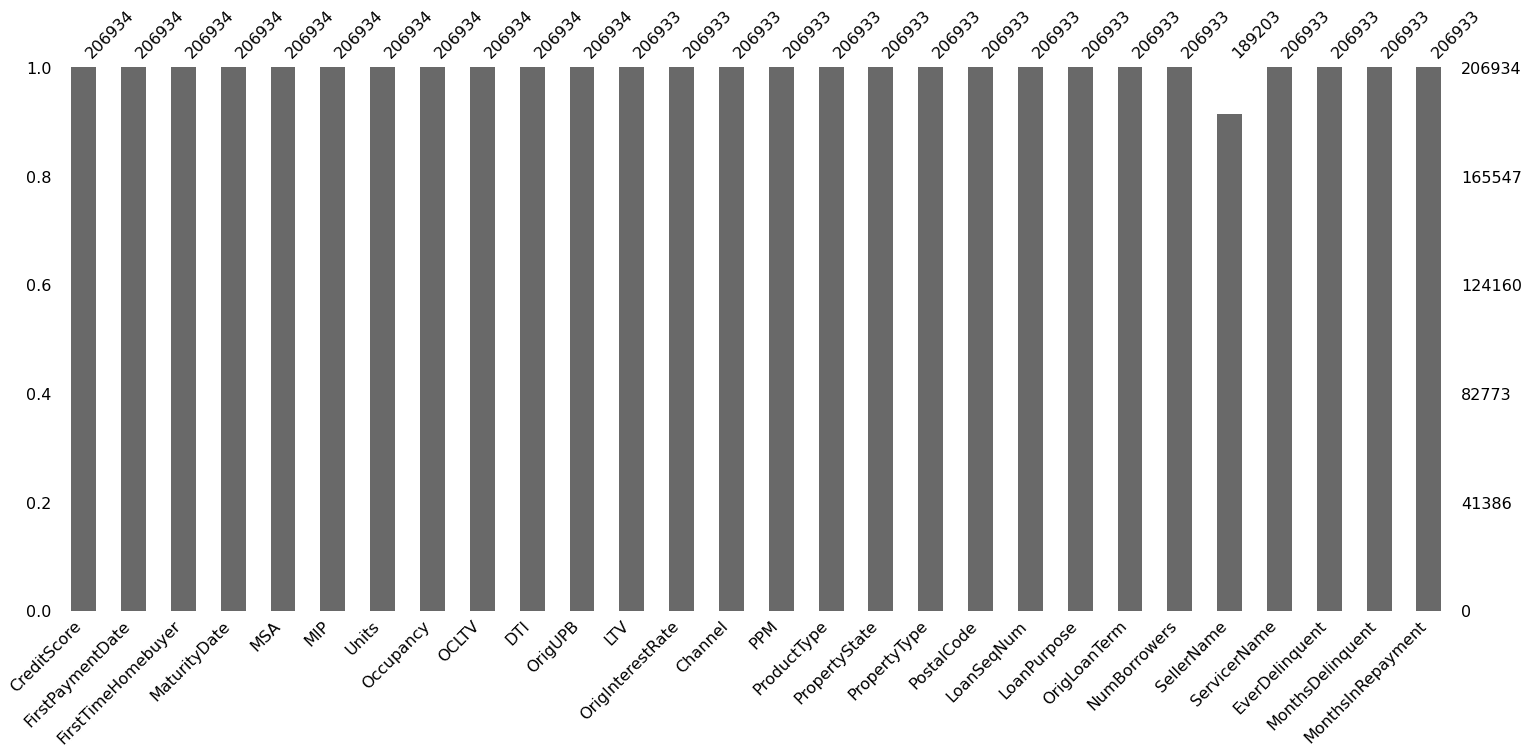

In [27]:
#bar plot showing where is missing values
msno.bar(Loan_data)

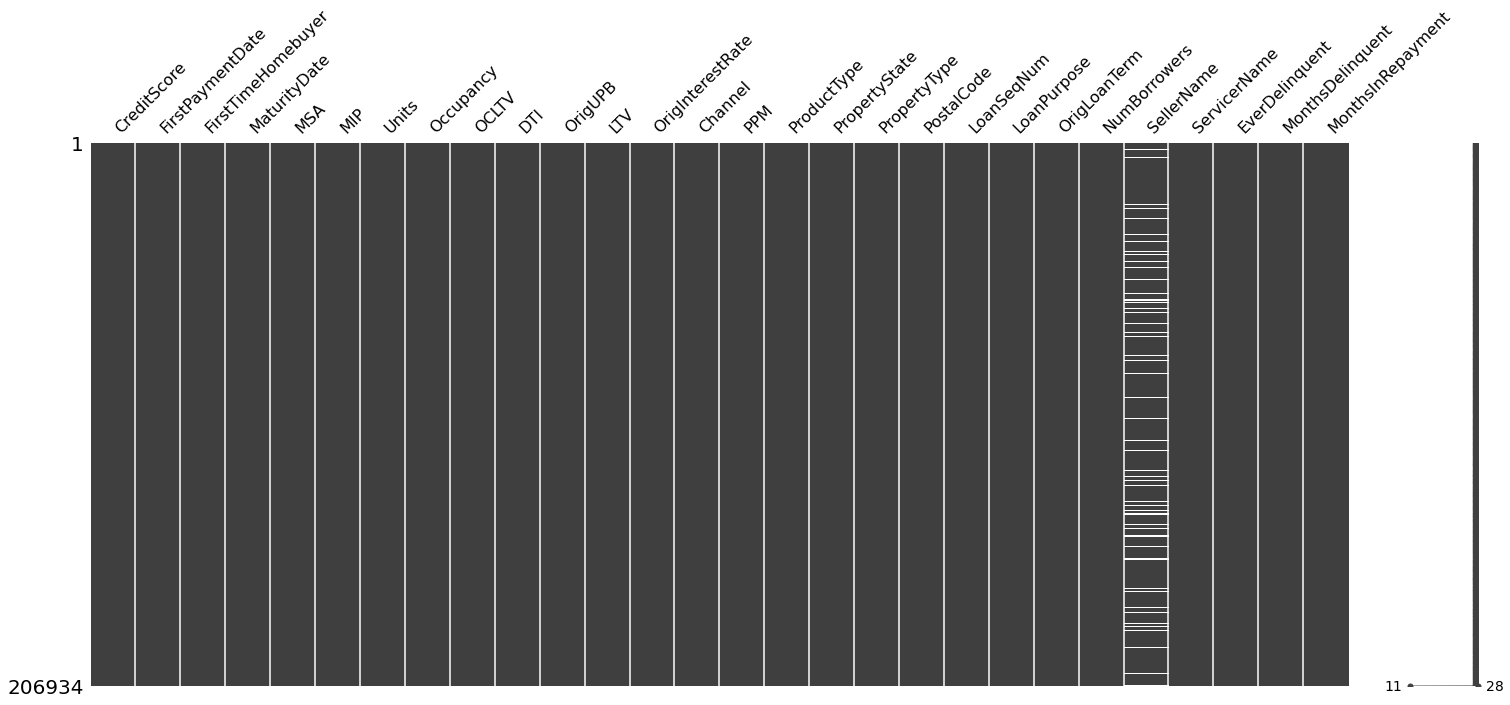

In [28]:
#plot shows position of missing values
msno.matrix(Loan_data)

In [35]:
 # filling null values . 
Loan_data ["SellerName"].fillna("No Seller Name", inplace = True)

In [44]:
Loan_data['SellerName'].isnull().sum()

0

In [46]:
Loan_data['FirstTimeHomebuyer'].unique()

array(['N', 'X', 'Y'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


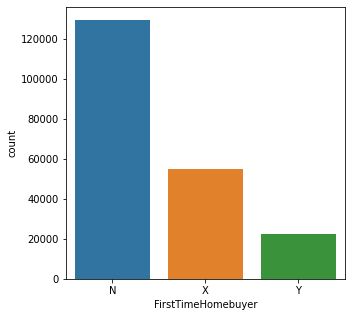

In [50]:
plt.figure(figsize=(5, 5))
sns.countplot(Loan_data.FirstTimeHomebuyer)

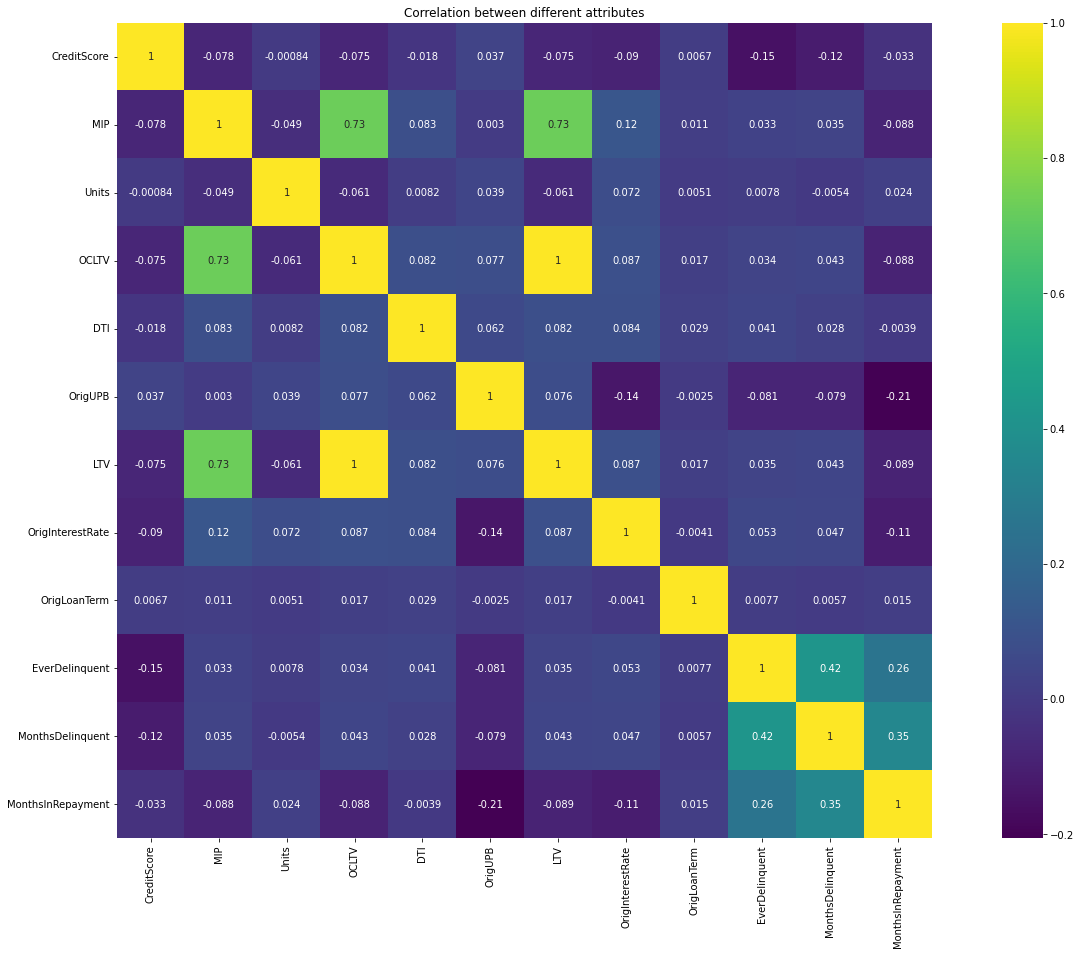

In [51]:
plt.figure(figsize=(25,15))
sns.heatmap(Loan_data.corr(),vmax=1, square=True,annot=True, cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()

In [53]:
Loan_data['Occupancy'].unique()

array(['O', 'I', 'S'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


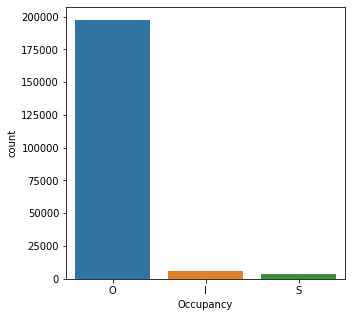

In [58]:
plt.figure(figsize=(5, 5))
sns.countplot(Loan_data.Occupancy)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


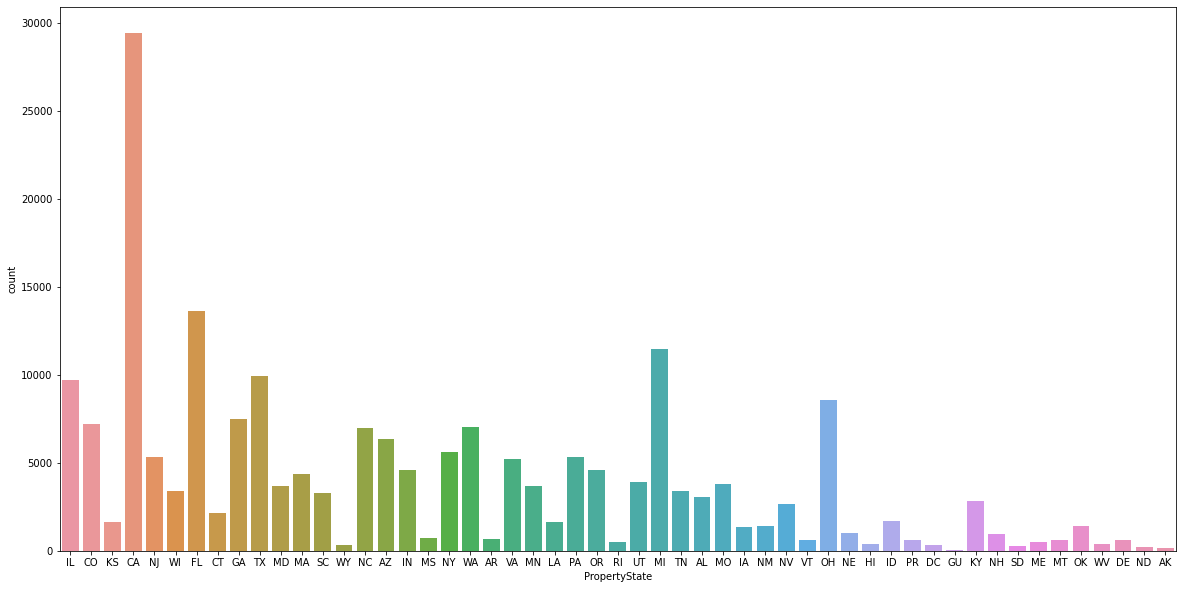

In [69]:
plt.figure(figsize=(20, 10))
sns.countplot(Loan_data.PropertyState)